In [1]:
%matplotlib inline

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pickle
import multiprocessing as mp
import matplotlib.pyplot as plt

n_estimators = 100

labels = ['5bins_edges', '200bins']

for label in labels:
    train = pickle.load(open('data/train_%s.pickle' % label, 'rb'))
    rf = RandomForestRegressor(n_estimators=n_estimators, n_jobs=mp.cpu_count())
    rf.fit(train['X'], train['y'])
    valid = pickle.load(open('data/valid_%s.pickle' % label, 'rb'))
    y_pred = rf.predict(valid['X'])

    from sklearn.metrics import mean_squared_error
    score = mean_squared_error(y_pred, valid['y'])
    print('MSE:', score)

MSE: 0.00845813285838
MSE: 0.00891769948921


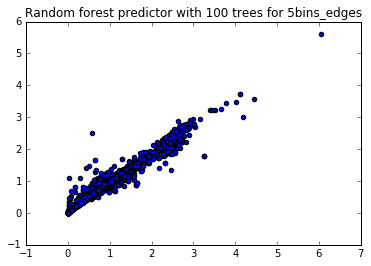

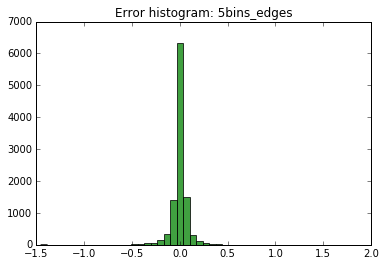

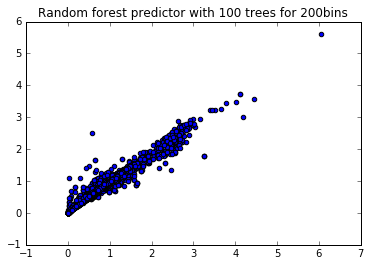

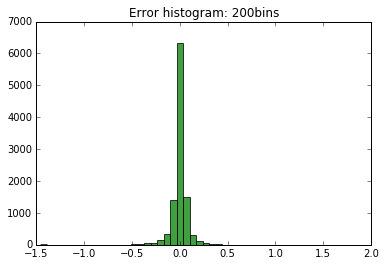

In [10]:
for label in labels:
    with open('rf_%s.pkl' % label, 'rb') as fd:
        rf = pickle.load(fd)
    plt.figure()
    plt.scatter(valid['y'], y_pred)
    plt.title('Random forest predictor with %s trees for %s' % (n_estimators, label))    
    
    plt.figure()
    n, bins, patches = plt.hist(y_pred-valid['y'], 50, facecolor='green', alpha=0.75)
    plt.title('Error histogram: %s' % label)
plt.show()    